In [84]:
# imports necessary for preprocessing
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer
import re

# Code to download corpora
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

# Imports to create Neural Net and metrics associated
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import random
import tensorflow as tf

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\khosh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\khosh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Preprocessing

In [85]:
# Load data
df= pd.read_csv("f2data.csv")
df.head(1)

,Address,Cost_S01,Cost_S02,Cost_S03,Cost_S04,Cost_S05,Cost_S06,Cost_S07,Cost_S08,Cost_S09,...,province_Yazd,province_Zanjan,tenure_0,tenure_Free,tenure_Mortgage,tenure_Other,tenure_OwnedEstate,tenure_OwnedEstateLand,tenure_Rent,tenure_Service
0,10001000108,13424000.0,630000.0,2250000.0,9012000.0,2577000.0,0.0,420000.0,520000.0,0.0,...,False,False,False,False,False,False,False,True,False,False


In [86]:
# check the basic information of the data set, dtypes, null values, column names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113150 entries, 0 to 113149
Columns: 120 entries, Address to tenure_Service
dtypes: bool(42), float64(76), int64(2)
memory usage: 71.9 MB


In [87]:
# # use get dummies to turn the category columns into number columns
# encoded_df = pd.get_dummies(df)
# encoded_df = encoded_df.drop('Address',axis=1)
# encoded_df.head()

# Assemble Neural Network (LSTM)

In [88]:
# Split Train and Test Data
df_train = df[~((df['Fasl']==4) & (df['year']==1401))]
df_test = df[(df['Fasl']==4) & (df['year']==1401)]


# split the dataset into X and y
X_train= df_train.drop(columns = ["Cost_S07"])
X_test=  df_test.drop(columns = ["Cost_S07"])
y_train =  df_train["Cost_S07"].values.reshape(-1,1)
y_test = df_test["Cost_S07"].values.reshape(-1,1)

# look at the shape of each data set
print("X_train shape" ,X_train.shape)
print("X_test shape" ,X_test.shape)
print("y_train shape" ,y_train.shape)
print("y_test shape" ,y_test.shape)



X_train shape (106139, 119)
X_test shape (7011, 119)
y_train shape (106139, 1)
y_test shape (7011, 1)


In [89]:
# use MinMaxScaler to scale the date
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

# scale the training data
x_scaler.fit(X_train)
y_scaler.fit(y_train)
X_train_scaled = x_scaler.transform(X_train)
X_test_scaled = x_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled =y_scaler.transform(y_test)

In [90]:
# This will act as a random state variable....it might not be exact but it will be close to previous run
seed_value = 0
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

In [91]:

# first we need to define the number of hidden nodes and input features
# start with a shallow network and expand from there
# I am going to start with the number of columns as the input features
number_input_columns = X_train.shape[1]
number_hidden_nodes = (X_train.shape[1]*2)

# Create NN
neural_network = Sequential()

# create the input latter
neural_network.add(Dense(units = number_input_columns, input_dim = number_input_columns, activation = "tanh", kernel_initializer='normal' ))
# create hidden layer
neural_network.add(Dense(units = number_hidden_nodes,  activation = "tanh", kernel_initializer='normal'))

# 2nd hidden layer
neural_network.add(Dense(units = number_hidden_nodes,  activation = "tanh", kernel_initializer='normal'))

# create output layer
neural_network.add(Dense(units = 1, activation = "linear", kernel_initializer='normal'))

# complie the NN and we can see how many total parameters along with how many parameters are in each layer
neural_network.compile(loss="mean_absolute_error", optimizer="adam", metrics=["mean_absolute_error"])
neural_network.summary()


c:\Users\khosh\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 119)            │        14,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 238)            │        28,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 238)            │        56,882 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │           239 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 99,961 (390.47 KB)

 Trainable params: 99,961 (390.47 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
2654/2654 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - val_loss: 0.0063 - val_mean_absolute_error: 0.0063
Epoch 2/20
2654/2654 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060
Epoch 3/20
2654/2654 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - val_loss: 0.0064 - val_mean_absolute_error: 0.0064
Epoch 4/20
2654/2654 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060
Epoch 5/20
2654/2654 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060
Epoch 6/20
2654/2654 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - val_loss: 0.0058 - val_mean_absolute_error: 0.0058
Epoch 7/20
2654/2654 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0065 - mean_absolute_err

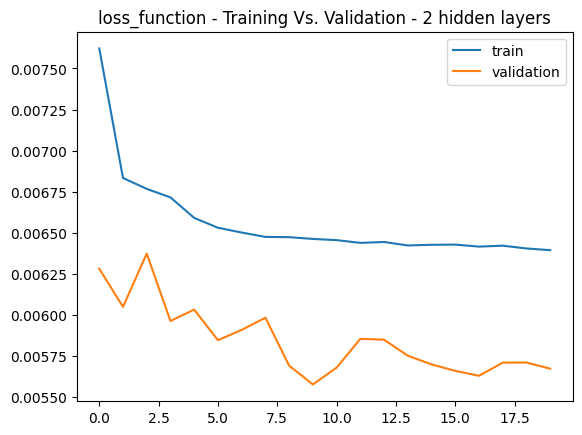

220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0129 - mean_absolute_error: 0.0129
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


,Real,Predicted
0,1100000.0,616988.875
1,3200000.0,1529501.000
2,5300000.0,2490268.000
3,1500000.0,3698176.750
4,1000000.0,2892253.750


In [92]:

# Fit the model to the training sets
nn_model = neural_network.fit(X_train_scaled, y_train_scaled,validation_split=0.2, epochs=20)

# Train vs test for shallow net
plt.plot(nn_model.history["loss"])
plt.plot(nn_model.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 2 hidden layers")
plt.legend(["train", "validation"])
plt.show()
plt.close()

# evaluate the model
neural_network.evaluate(X_test_scaled, y_test_scaled)

# make predictions on X_test_scaled
predictions = neural_network.predict(X_test_scaled)

predicted_cost = y_scaler.inverse_transform(predictions)
real_cost = y_scaler.inverse_transform(y_test_scaled.reshape(-1, 1))

cost= pd.DataFrame({
    "Real": real_cost.ravel(),
    "Predicted":predicted_cost.ravel()
})
cost.head()

In [93]:
from sklearn.metrics import r2_score
r2 = r2_score(real_cost.ravel() , predicted_cost.ravel())

print('R2 Score: ',r2)

R2 Score:  0.1578008403567498
